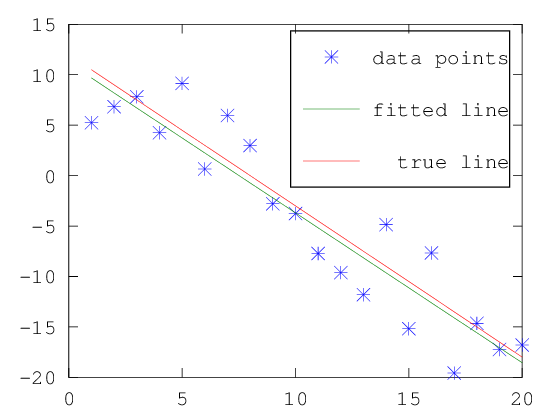

In [1]:
# this generates data according to classical model
# and shows the OLS fit

n = 20;
x = 1:n;
x = x';

x = [ones(n,1) x];
beta = [12; -1.5];
true = x*beta;
e = 4*randn(n,1);
y = true + e;

# the OLS coefficients
b = inverse(x'*x)*x'*y;

# Plot the fitted line
yhat = x*b;
x = x(:,2);
#title("Example OLS fit");
xlabel("X");
plot(x, y, "*;data points;", x, yhat, "-;fitted line;", x, true, "-;true line;")
%print("OlsFit.svg", "-dsvg");


In [ ]:
# Estimates the basic Nerlove Cobb-Douglas model
1;


function m = nm(theta, data)
	y = data(:,1);
	x = data(:,2:columns(data));
	e = y - x*theta;
	m = diag(e)*x;
endfunction

function m = nm2(theta, data)
	y = data(:,1);
	x = data(:,2:columns(data));
	e = y - x*theta;
	x = [x st_norm(x(:,2:5).^2)];
	m = diag(e)*x;
endfunction


load nerlove.data;

data = data(:,2:6);
data = log(data);
n = rows(data);
y = data(:,1);
x = data(:,2:5);
x = [ones(n,1), x];
%x = [ones(n,1), x, x(:,1).^2];

names = char("constant", "output","labor", "fuel", "capital","output2");
%names = char("constant", "output","labor", "fuel", "capital","output2");
data = [ y x ];

# estimate efficient weight matrix
b = mc_ols(y,x, "", 1);
e = y - x*b;
m = x .*e;
q = rows(x)^ 0.25;
q = floor(q); % round down
momentcov = NeweyWest(m, q);
weight = inv(momentcov);

# note that weights don't matter for results - exactly identified
gmm_results(b, data, 1, "nm", "", names, "Nerlove model estimated using GMM - Identity weight matrix", "", "", 0, momentcov);
gmm_results(b, data, weight, "nm", "", names, "Nerlove model estimated using GMM - NW efficient weight matrix", "", "", 0, momentcov);

error: load: unable to find file nerlove.data
